# 📈 DataSet Requirements and Exploratory Data Analysis


## 💾 Dataset Requirements

The time series must reflect the following criteria:
* Reflects a recurring normal/bell curve pattern
* Period of 1 day, to simulate the gradual increase/decrease of traffic throughout the day
* Sudden spikes, plateaus or missing/zero data

## 🔎 Dataset Search

We have searched through the recommended sources to find datasets that best simulates the web traffic that the current implementation is getting. Below are the top selection:

 | Dataset | Evaluation |
 |--------:|------------|
 | [Web Traffic Dataset](https://www.kaggle.com/datasets/raminhuseyn/web-traffic-time-series-dataset) | ❎ While this dataset nearly reflects the pattern we would like to simulate, there are no labels to identify anamalous traffic which would then result in difficulties in computing the metrics |
 | [Time Series with anomalies](https://www.kaggle.com/datasets/drscarlat/time-series/data) | ❎ This dataset has the corresponding labels for success metric computation, however the values include negative numbers. This does not relate well to web traffic data |
 | [Controlled Anomalies Time Series (CATS) Dataset](https://www.kaggle.com/datasets/patrickfleith/controlled-anomalies-time-series-dataset) | ❎ This dataset also has the target label present, however, it is far too complex from what is needed |

**NOTE:**
Please refer to experiments to see more details about the dataset evaluations mentioned above.

To gain progress with the activity, we decided to generate data that would best represent the traffic data being experienced.

## ⚙️ Generated DataSet



In [8]:
# Setup
import sys
import importlib
sys.path.append('../src')

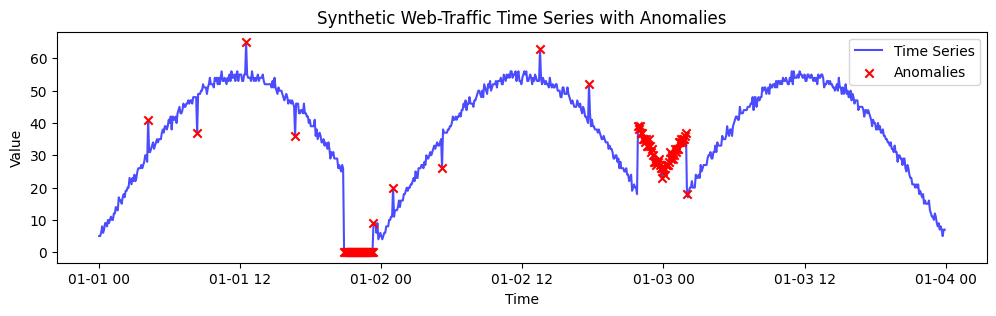

In [9]:
from dataset_generator import generate_dataset
import matplotlib.pyplot as plt

sample_data = generate_dataset()

# Save the generated sample dataset to be used later
sample_data.to_csv('generated_dataset.csv', index=False)

plt.figure(figsize=(12, 3))

# Plot the Time Series Data
plt.plot(sample_data['timestamp'], sample_data['value'], label='Time Series', color='blue', alpha=0.7)

# Mark the anomalous points
plt.scatter(sample_data[sample_data['is_anomaly'] == 1]['timestamp'],
            sample_data[sample_data['is_anomaly'] == 1]['value'],
            color='red', label='Anomalies', zorder=5, marker='x')

plt.title("Synthetic Web-Traffic Time Series with Anomalies")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

As can be seen above, the dataset generated highly reflects the experienced volume and anomalies. Web Traffic increases as it goes from morning to midday, then would decrease as we go to evening.

### 💭Dataset Analysis

Let us still run a comprehensive dataset analysis to better understand the generated dataset


COMPREHENSIVE EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW

Shape: 864 rows × 3 columns
Memory usage: 0.07 MB

Column types:
int64     2
object    1
Name: count, dtype: int64

2. MISSING VALUES ANALYSIS

✓ No missing values found!

3. NUMERICAL FEATURES SUMMARY

Numerical features: 1
         value
count  864.000
mean    36.905
std     15.351
min      0.000
25%     27.000
50%     39.500
75%     51.000
max     65.000


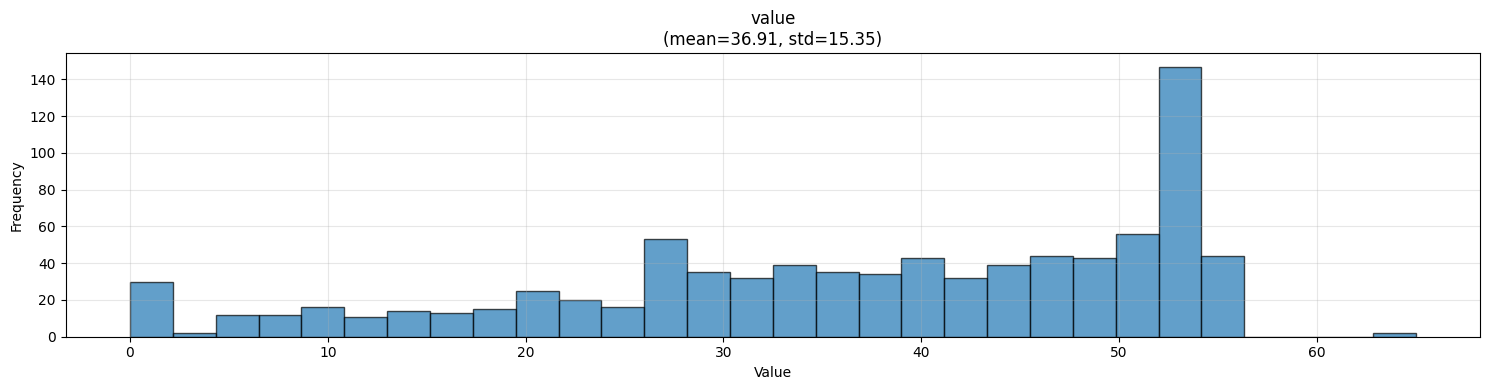


4. CATEGORICAL FEATURES SUMMARY

Categorical features: 1

timestamp:
  Unique values: 864
  Top 5 values:
timestamp
2024-01-03 22:35:00    1
2024-01-03 22:30:00    1
2024-01-03 22:25:00    1
2024-01-03 22:20:00    1
2024-01-03 22:15:00    1
Name: count, dtype: int64

5. TARGET VARIABLE ANALYSIS

Target: is_anomaly

✓ EDA COMPLETE


In [10]:
import pandas as pd
from comprehensive_eda import comprehensive_eda

# Load Data Set from CSV
web_traffic_df = pd.read_csv('../data/generated_dataset.csv')

# Run the comprehensive EDA given
comprehensive_eda(web_traffic_df, target_col='is_anomaly')